In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

DATASET_PATH = "/content/drive/My Drive/Hairstyles_Dataset"

Mounted at /content/drive


In [3]:
# Set Parameters
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 15
INPUT_SHAPE = (128, 128, 1)

In [ ]:
# Re-Scale & Split Data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
)

In [5]:
# Load Train and Validation data
train_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode="grayscale",
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode="grayscale",
    subset='validation'
)

Found 2080 images belonging to 5 classes.
Found 520 images belonging to 5 classes.


In [6]:
# Check Hairstyle Classes
class_names = list(train_generator.class_indices.keys())
print("Class labels:", class_names)

Class labels: ['braid', 'long', 'ponytail', 'short', 'twintail']


In [ ]:
# Build CNN Model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=INPUT_SHAPE),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5), # Prevent Overfitting
    keras.layers.Dense(len(class_names), activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
# Display Model's Structure
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,709 (12.61 MB)

 Trainable params: 3,304,709 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Train Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 582s 9s/step - accuracy: 0.2374 - loss: 1.6965 - val_accuracy: 0.5385 - val_loss: 1.1559
Epoch 2/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.5211 - loss: 1.1578 - val_accuracy: 0.6731 - val_loss: 0.9357
Epoch 3/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.6451 - loss: 0.8906 - val_accuracy: 0.7442 - val_loss: 0.7268
Epoch 4/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.7137 - loss: 0.7367 - val_accuracy: 0.7750 - val_loss: 0.6363
Epoch 5/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.7602 - loss: 0.6055 - val_accuracy: 0.8173 - val_loss: 0.5099
Epoch 6/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.8365 - loss: 0.4547 - val_accuracy: 0.8519 - val_loss: 0.4450
Epoch 7/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.8287 - loss: 0.4384 - val_accuracy: 0.8308 - val_loss: 0.4500
Epoch 8/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.8772 - loss: 0.3506 - val_accuracy: 0.8404 - v

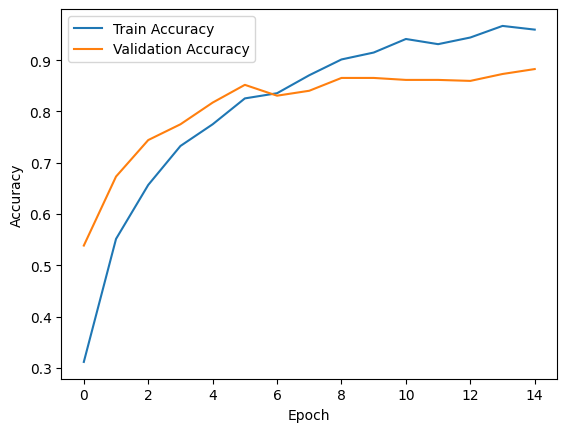

In [11]:
# Train Result
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
# Save Model
model.save("/content/drive/My Drive/neural_model.h5")